# Class 4 Notebook – Unsupervised Learning: Hierarchical (Agglomerative) Clustering

This notebook demonstrates **Unsupervised Machine Learning** using **Hierarchical (Agglomerative) Clustering**.

Unlike supervised learning (Classes 2–3), unsupervised learning works with **unlabeled data**. Here, we will automatically group customers based on:
- **Annual Income** (in thousands)
- **Spending Score** (0–100, based on purchase behavior)

**Objective**: Automatically discover customer segments (e.g., high-income/low-spending, low-income/high-spending) to understand shopping patterns and target marketing campaigns.

**Model type**: Agglomerative (bottom‑up) hierarchical clustering.

**Key idea**: Each customer starts as their own cluster. The algorithm repeatedly merges the two closest clusters until only a few remain. We can visualize this process with a **dendrogram**, which shows the complete hierarchy of how clusters merge.

We will follow a clear step‑by‑step workflow:

1. Install/import libraries
2. Create customer dataset (Annual Income, Spending Score)
3. Visualize data (scatter plot)
4. Apply Agglomerative Clustering
5. Visualize clusters
6. Plot dendrogram and interpret the hierarchy

Run the first code cell to confirm your environment works.

## Run in the browser (no local setup)

[![Open In Colab](https://colab.research.google.com/assets/colab-badge.svg)](https://colab.research.google.com/github/adzuci/ai-fundamentals/blob/main/class-4-unsupervised-learning/02_class_4_hierarchical_clustering_basics.ipynb)

> Tip: This notebook assumes you're comfortable with basic Python, NumPy, Pandas, and Matplotlib from Classes 2 and 3.

## STEP 1: Install Required Libraries

If running locally, install the required packages. In Colab, these are already available.

In [19]:
# Install required libraries (run this if needed)
# Uncomment the line below if running locally and packages aren't installed
# !pip install numpy pandas matplotlib scikit-learn scipy

## STEP 2: Import Libraries

Import NumPy, Pandas, Matplotlib, scikit-learn's `AgglomerativeClustering`, and SciPy's dendrogram helpers.

In [20]:
# Environment sanity check + imports
import platform

print("Python:", platform.python_version())
print("OS:", platform.system(), platform.release())

try:
    import numpy as np
    import pandas as pd
    import matplotlib.pyplot as plt
    from sklearn.cluster import AgglomerativeClustering
    from scipy.cluster.hierarchy import dendrogram, linkage

    print("All libraries imported successfully!")
except ModuleNotFoundError as exc:
    print("Missing dependency:", exc)
    print("Install with: python -m pip install numpy pandas matplotlib scikit-learn scipy")
    raise

Python: 3.10.14
OS: Darwin 25.2.0
All libraries imported successfully!


## STEP 3: Create Customer Dataset

We'll create a customer dataset with:
- `Annual_Income` (in thousands of dollars)
- `Spending_Score` (0–100, based on purchase frequency and amount)

Notice: **No target/label column** — this is unsupervised learning! We're discovering natural customer segments without predefined categories.

In [21]:
# Create sample customer data with pairs of clusters
# Pair 1: High-income clusters (close together)
#   - Cluster A: High income, low spending (savers) - 85-90k income, 15-20 spending
#   - Cluster B: High income, medium spending (moderate) - 80-85k income, 40-45 spending
# Pair 2: Low-income clusters (close together)
#   - Cluster C: Low income, high spending (spenders) - 15-20k income, 80-85 spending
#   - Cluster D: Low income, medium spending (budget-conscious) - 20-25k income, 45-50 spending

data = {
    "Annual_Income": [
        # Pair 1 - Cluster A: High income, low spending (savers)
        88, 90, 87, 85, 89,
        # Pair 1 - Cluster B: High income, medium spending (moderate)
        82, 84, 81, 83, 85,
        # Pair 2 - Cluster C: Low income, high spending (spenders)
        18, 20, 17, 19, 16,
        # Pair 2 - Cluster D: Low income, medium spending (budget-conscious)
        22, 24, 23, 21, 25
    ],
    "Spending_Score": [
        # Pair 1 - Cluster A: High income, low spending
        18, 20, 17, 15, 19,
        # Pair 1 - Cluster B: High income, medium spending
        42, 44, 41, 43, 45,
        # Pair 2 - Cluster C: Low income, high spending
        82, 84, 81, 83, 85,
        # Pair 2 - Cluster D: Low income, medium spending
        47, 49, 46, 48, 50
    ]
}

customers_df = pd.DataFrame(data)
print("Customer Data:")
print(customers_df)
print("\nData shape:", customers_df.shape)
print("Notice: No 'target' or 'label' column — this is unsupervised learning!")
print("\nWe'll discover natural customer segments based on income and spending patterns.")
print("\nExpected structure: Two pairs of clusters that merge first, then pairs merge together.")
print("  - Pair 1: High-income clusters (A: savers, B: moderate)")
print("  - Pair 2: Low-income clusters (C: spenders, D: budget-conscious)")

Customer Data:
    Annual_Income  Spending_Score
0              88              18
1              90              20
2              87              17
3              85              15
4              89              19
5              82              42
6              84              44
7              81              41
8              83              43
9              85              45
10             18              82
11             20              84
12             17              81
13             19              83
14             16              85
15             22              47
16             24              49
17             23              46
18             21              48
19             25              50

Data shape: (20, 2)
Notice: No 'target' or 'label' column — this is unsupervised learning!

We'll discover natural customer segments based on income and spending patterns.

Expected structure: Two pairs of clusters that merge first, then pairs merge together.
  - Pair 1

## STEP 4: Visualize Data (Before Clustering)

Let's see what the raw customer data looks like before applying clustering. Notice how customers naturally form groups based on income and spending patterns.

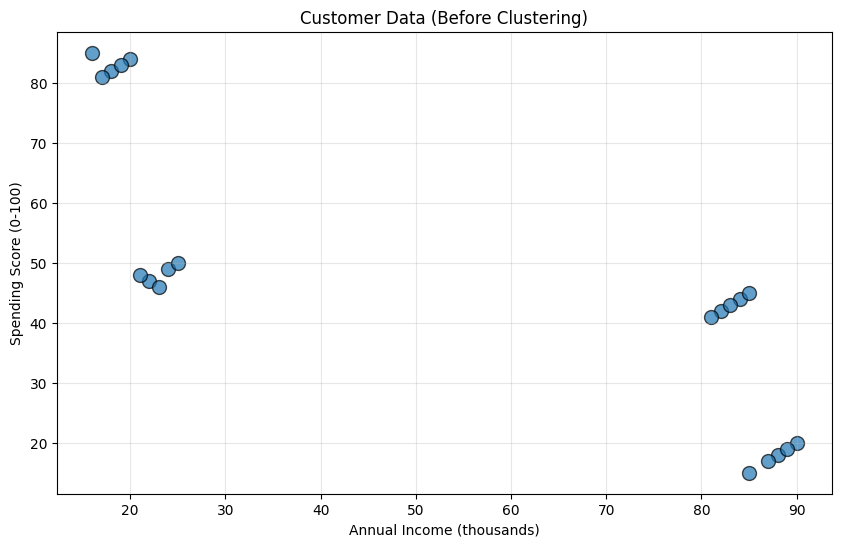

Can you spot natural groups? The clustering algorithm will find them automatically!


In [22]:
# Visualize the raw customer data
plt.figure(figsize=(10, 6))
plt.scatter(customers_df["Annual_Income"], customers_df["Spending_Score"], s=100, alpha=0.7, edgecolors='k')
plt.xlabel("Annual Income (thousands)")
plt.ylabel("Spending Score (0-100)")
plt.title("Customer Data (Before Clustering)")
plt.grid(True, alpha=0.3)
plt.show()

print("Can you spot natural groups? The clustering algorithm will find them automatically!")

## STEP 5: Apply Agglomerative (Hierarchical) Clustering

We'll use `AgglomerativeClustering` to automatically find **4 clusters** in our customer data (matching the natural groups we created).

Key choices:
- `n_clusters=4` (we expect 4 customer segments)
- `linkage="ward"` (minimizes variance within each cluster; automatically uses euclidean distance)

In [23]:
# Prepare features (Annual_Income, Spending_Score)
X = customers_df[["Annual_Income", "Spending_Score"]].values

# Create and fit the Agglomerative Clustering model
# Note: For 'ward' linkage, metric is automatically 'euclidean' (no need to specify)
agg_model = AgglomerativeClustering(n_clusters=4, linkage="ward")
cluster_labels = agg_model.fit_predict(X)

customers_df["Cluster"] = cluster_labels
print("Cluster labels added to DataFrame:")
print(customers_df)
print("\nEach customer is now assigned to one of 4 clusters based on their income and spending patterns.")

Cluster labels added to DataFrame:
    Annual_Income  Spending_Score  Cluster
0              88              18        0
1              90              20        0
2              87              17        0
3              85              15        0
4              89              19        0
5              82              42        1
6              84              44        1
7              81              41        1
8              83              43        1
9              85              45        1
10             18              82        2
11             20              84        2
12             17              81        2
13             19              83        2
14             16              85        2
15             22              47        3
16             24              49        3
17             23              46        3
18             21              48        3
19             25              50        3

Each customer is now assigned to one of 4 clusters based on t

## STEP 6: Visualize Clusters

Now we'll color each customer by its cluster label to see how the algorithm grouped them. Each color represents a different customer segment.

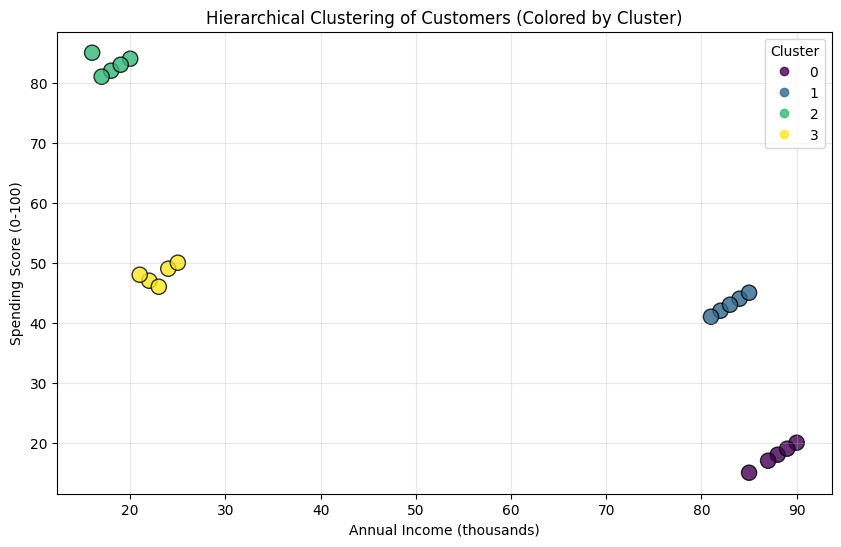


Each cluster represents a different customer segment:
The dendrogram will show how pairs merge first:
  - Pair 1: High-income clusters merge together (A + B)
  - Pair 2: Low-income clusters merge together (C + D)
  - Then the two pairs merge at a higher distance


In [24]:
# Visualize clustered data
plt.figure(figsize=(10, 6))
scatter = plt.scatter(
    customers_df["Annual_Income"],
    customers_df["Spending_Score"],
    c=customers_df["Cluster"],
    cmap="viridis",
    s=120,
    alpha=0.8,
    edgecolor="k"
)
plt.xlabel("Annual Income (thousands)")
plt.ylabel("Spending Score (0-100)")
plt.title("Hierarchical Clustering of Customers (Colored by Cluster)")
plt.grid(True, alpha=0.3)
plt.legend(*scatter.legend_elements(), title="Cluster")
plt.show()

print("\nEach cluster represents a different customer segment:")
print("The dendrogram will show how pairs merge first:")
print("  - Pair 1: High-income clusters merge together (A + B)")
print("  - Pair 2: Low-income clusters merge together (C + D)")
print("  - Then the two pairs merge at a higher distance")

## STEP 7: Dendrogram (Understanding the Hierarchy)

A **dendrogram** shows how clusters are merged step by step. Each leaf is a customer, and branches show which customers/clusters were merged together.

### How to Read a Dendrogram

The dendrogram visualizes the **complete hierarchy** of cluster merges:

1. **Bottom (Leaves)**: Each customer starts as their own cluster (C0, C1, C2, ..., C19)
2. **Low Branches**: The most similar customers merge first (at low distances)
3. **Middle Branches**: Small clusters merge into larger groups
4. **Top (Root)**: All customers eventually merge into one cluster

**Key insights:**
- **Height of merge** = distance/dissimilarity between clusters
  - Low height = very similar (merged early)
  - High height = less similar (merged later)
- **Horizontal lines** connect clusters that were merged
- **Vertical lines** show the distance at which the merge occurred

**The hierarchy is visible in the nested structure:**
- Individual customers → small groups → larger groups → one final cluster
- You can "cut" the dendrogram at different heights to get different numbers of clusters

We will use SciPy's `linkage` and `dendrogram` functions to visualize this complete hierarchy.

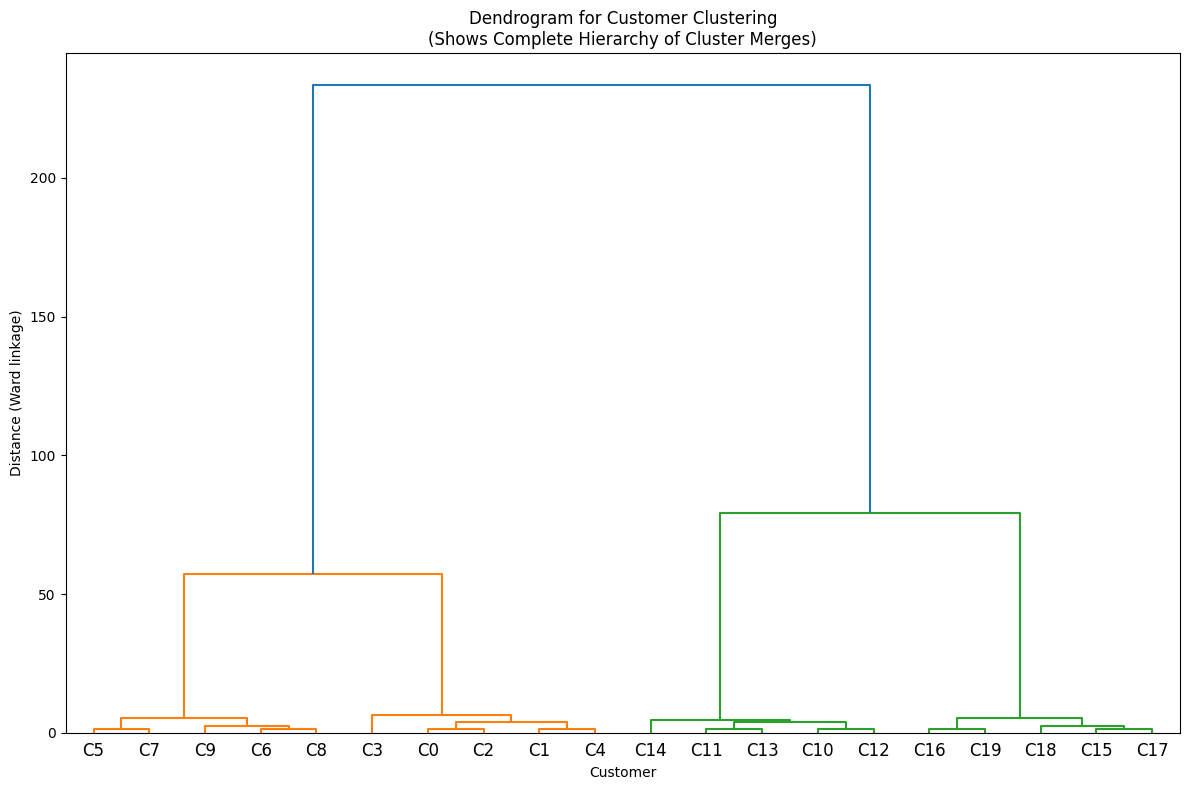


📊 Reading the dendrogram:
1. Start at the bottom: each C0-C19 is one customer
2. Follow branches upward: see which customers merge first (most similar)
3. Notice the two main branches: they represent the major customer groups
4. The height shows how similar/dissimilar clusters are when merged

💡 Tip: Draw a horizontal line across the dendrogram to see how many clusters
   you'd get at that distance level. Lower = more clusters, higher = fewer clusters.


In [25]:
# Compute linkage matrix for dendrogram
Z = linkage(X, method="ward")

# Plot the dendrogram
plt.figure(figsize=(12, 8))
dendrogram(Z, labels=[f"C{i}" for i in range(len(customers_df))])
plt.title("Dendrogram for Customer Clustering\n(Shows Complete Hierarchy of Cluster Merges)")
plt.xlabel("Customer")
plt.ylabel("Distance (Ward linkage)")
plt.tight_layout()
plt.show()

print("\n📊 Reading the dendrogram:")
print("1. Start at the bottom: each C0-C19 is one customer")
print("2. Follow branches upward: see which customers merge first (most similar)")
print("3. Notice the two main branches: they represent the major customer groups")
print("4. The height shows how similar/dissimilar clusters are when merged")
print("\n💡 Tip: Draw a horizontal line across the dendrogram to see how many clusters")
print("   you'd get at that distance level. Lower = more clusters, higher = fewer clusters.")